In [1]:
import csv
import json
import pandas as pd
from datetime import datetime
import numpy as np
from collections import Counter


import warnings
warnings.filterwarnings("ignore")


localFolder = "../data_2019_processed/"
baseFolder = "../../Dataset_ECUADOR_2019/"

In [7]:
# Dataframe of all datasets
# initialize list of lists
datasets = [['0Jf4TH9Zzse0Z1Jjh7SnTOe2MMzeSnFi7feTnkG6vgs'],
            ['0tdmm6rwW3KquQ73ATYYJ5JkpMtvbppJ0VzA2GExdA'], 
            ['2cyV53lVyUtlMj0BRwilEWtYJwUiviYoL48cZBPBq0'], 
            ['2J22RukYnEbKTk7t+iUVDBkorcyL5NKN6TrLe89ys'], 
            #['5FLZBTVAPwdq9QezHE2sVCJIs7p+r6mCemA2gp9jATk'], #does not have the file
            ['7EYF5I04EVqisUJCVNHlqn77UAuOmwL2Dahxd3cA'], 
            ['a9Qgj8ENWrHvl9QqlXcIPKmyGMKgbfHk9Dbqon1HQP4'], 
            ['ae4JJBZDycEcY8McJF+3BxyvZ1619y03BNdCxzpZTc'], 
            ['Ch3u5Oaz96VSrQbf0z31X6jEIbeIekkC0mwPzCdeJ1U'], 
            ['CH8f0yZkZL13zWuE9ks1CkVJRVrr+jsGdUXHrZ6YeA'], 
            ['DHO1K4jgiwZJOfQTrxvKE2vn7hkjamigroGD5IaeRc'], 
            ['DHPqzSqSttiba1L3BD1cptNJPjSxZ8rXxF9mY3za6WA'], 
            ['dQEFscjqnIlug8Tgq97JohhSQPG2DEOWJqS86wCrcY'], 
            ['HFvs2CohmhHte+AaCzFasjzegGzxZKPhkrX23iI6Xo'], 
            ['jgB9E8v3Z6PKdTRTCMAijBllA9YEMtrmHbe4qsbmJWw'], 
            ['JkY++R7E8myldLN3on6iQ78Ee78zCbrLuggfwGju3I'], 
            ['K4SLohf+TN1Ak8Dn8iE3Lme7rEMPISfppB2sXfHX8'], 
            ['oGaWetJJJEWHuvYdWYo826SQxfhCExVVQ2da8LE1Y7Q'], 
            ['pyt24oiDAHsmgWMvkFKz2fn2pwcHiXchd6KchLM'], 
            ['PZCf1nfvhR+6fk+7+sPNMYOgb8BAMmtQtfoRS83Suc'], 
            ['QUNCATForxzK0HHw46LrGOMWh0eVA8Y5XWEiUXX+cQ'], 
            ['rIl2UK9+bQ+tzpFdbJAdbBxEa5GbgrgC030yEaENLw'], 
            ['RoBW3cDOO9wWRMPO2twQff83MPc+OXn6gJ+a1DafreI'], 
            ['SH3kQeyd5volraxw8vOyhlowNqWBPr1IJ9URNXUL4'], 
            ['VVpwFNMrEglveh6MDN8lrRzTy5OwzglD4FURfM4A2is'], 
            ['Wa1mcNmbh66S7VS6GIzyfCFMD3SGhbtDQyFP1ywJEsw'], 
            ['XCKRE0BWRHxfP1kZIihgtT+jUjSp2GE8v5ZlhcIhVmA'], 
            ['YI5Y79K6GXqAUoGP6PNyII8WKlAoel4urDxWSVVOvBw'], 
            ['ypklj+8GJ15rOIH1lpKQtFJOuK+VdvyCuBPqhY3aoM'], 
            ['ZSsAZ0Pq+MCqFrnjsRFn5Ua09pMCVaOV9c8ZuYb7XQY']]
  
# Create the pandas DataFrame
folders = pd.DataFrame(datasets, columns=['folder'])

#folders

In [8]:
timestamp = 0
count_24_plus, count_12_24_plus, count_12_minus, count_0 = 0,0,0,0
# analyse the forms
allData = pd.DataFrame()
for indexFolder, folder in folders.iterrows():
   
    dataFLabel = pd.read_csv(localFolder+"form/sleep_form_"+folder['folder']+"_treated.csv",
                   delimiter=',', encoding="utf8")
    originalFLabel = pd.read_csv(baseFolder+folder['folder']+"/sleep_form_"+folder['folder']+".csv",
                   delimiter=',', encoding="utf8")
    
    count_24_plus = count_24_plus + dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0]
    count_12_24_plus = count_12_24_plus + (dataFLabel[dataFLabel['time_sleeping_hs'] > 12 ].shape[0]-dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0])
    count_12_minus = count_12_minus + dataFLabel[dataFLabel['time_sleeping_hs'] <= 12].shape[0]
    count_0 = count_0 + dataFLabel[dataFLabel['time_sleeping_hs'] <= 0].shape[0]
                                 
    print(folder['folder'])
    print("Original Count: ",originalFLabel.shape[0])
    print("New Count: ",dataFLabel.shape[0])
    print("Time sleep: ",dataFLabel['time_sleeping_hs'].max(),dataFLabel['time_sleeping_hs'].min(),dataFLabel['time_sleeping_hs'].mean())
    print("Sleep variability",)
    print("Count > 24:",dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0])
    print("Count <= 24 and > 12:",(dataFLabel[dataFLabel['time_sleeping_hs'] > 12 ].shape[0]-dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0]))
    print("Count <= 12:",dataFLabel[dataFLabel['time_sleeping_hs'] <= 12].shape[0])
    print("Count <= 0:",dataFLabel[dataFLabel['time_sleeping_hs'] <= 0].shape[0])
    print()  
    
        
                                  

0Jf4TH9Zzse0Z1Jjh7SnTOe2MMzeSnFi7feTnkG6vgs
Original Count:  33
New Count:  33
Time sleep:  20.75333333333333 0.0 6.897390572390572
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 3
Count <= 12: 30
Count <= 0: 1

0tdmm6rwW3KquQ73ATYYJ5JkpMtvbppJ0VzA2GExdA
Original Count:  31
New Count:  31
Time sleep:  22.50277777777778 2.5097222222222224 8.223960573476703
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 4
Count <= 12: 27
Count <= 0: 0

2cyV53lVyUtlMj0BRwilEWtYJwUiviYoL48cZBPBq0
Original Count:  48
New Count:  48
Time sleep:  16.0 0.0 5.026122685185185
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 1
Count <= 12: 47
Count <= 0: 1

2J22RukYnEbKTk7t+iUVDBkorcyL5NKN6TrLe89ys
Original Count:  50
New Count:  50
Time sleep:  33.004444444444445 4.0 12.810561111111113
Sleep variability
Count > 24: 10
Count <= 24 and > 12: 3
Count <= 12: 37
Count <= 0: 0

7EYF5I04EVqisUJCVNHlqn77UAuOmwL2Dahxd3cA
Original Count:  15
New Count:  15
Time sleep:  31.511111111111116 3.2622222222222

In [9]:
print("Status geral")
print("Count > 24:",count_24_plus)
print("Count <= 24 and > 12:",count_12_24_plus)
print("Count <= 12:",count_12_minus)
print("Count <= 0:",count_0)
print("total:",(count_0+count_12_minus+count_12_24_plus+count_24_plus))
print()  

Status geral
Count > 24: 74
Count <= 24 and > 12: 81
Count <= 12: 810
Count <= 0: 7
total: 972



In [10]:
dataset = pd.read_csv(localFolder+"allData.csv")



In [11]:
dataset['timestamp2'].min()

1526043855

In [7]:
dsMetrics = pd.read_csv("result_trad_LSTM_undb.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM,128,2,32,4,awake,0.709463,0.709946,0.990396,0.827042,0.054567,0.663188
1,LSTM,128,2,32,4,asleep,0.711055,0.685160,0.049745,0.092756,0.054760,0.662755
2,LSTM,128,2,32,4,avg,0.710259,0.697553,0.520071,0.459899,0.054663,0.662972
3,LSTM,128,7,32,4,awake,0.714056,0.711446,0.996464,0.830173,0.064711,0.695073
4,LSTM,128,7,32,4,asleep,0.715648,0.856489,0.050882,0.096058,0.064918,0.694627
5,LSTM,128,7,32,4,avg,0.714852,0.783968,0.523673,0.463115,0.064815,0.694850
6,LSTM,128,15,32,4,awake,0.724872,0.727205,0.972569,0.832178,0.149747,0.713954
7,LSTM,128,15,32,4,asleep,0.726362,0.687900,0.143577,0.237570,0.150452,0.713529
8,LSTM,128,15,32,4,avg,0.725617,0.707552,0.558073,0.534874,0.150100,0.713742
9,LSTM,128,30,32,4,awake,0.724505,0.730270,0.962839,0.830582,0.162459,0.686071


<AxesSubplot: xlabel='epochs'>

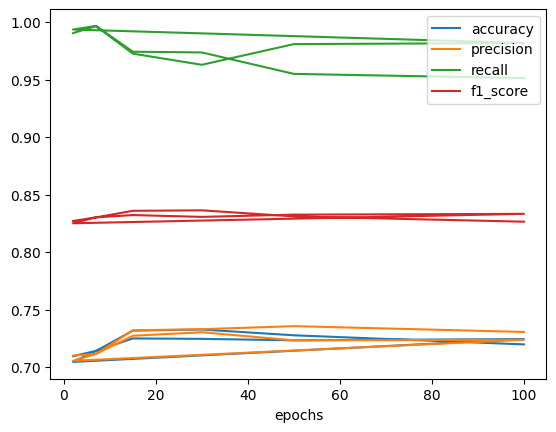

In [8]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "awake"]
lines = dfMetricsClass[metrics].plot.line(x='epochs')

lines

<AxesSubplot: xlabel='epochs'>

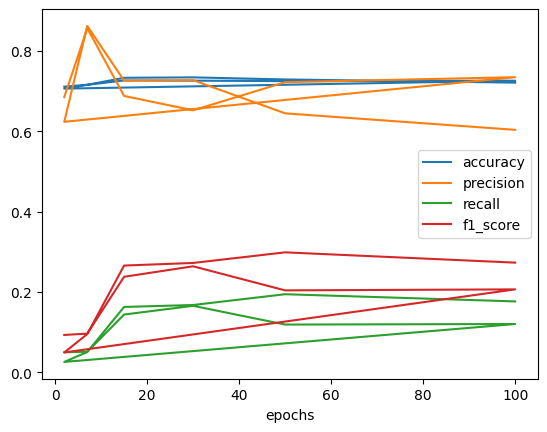

In [9]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
lines = dfMetricsClass[metrics].plot.line(x='epochs')

lines

<AxesSubplot: xlabel='epochs'>

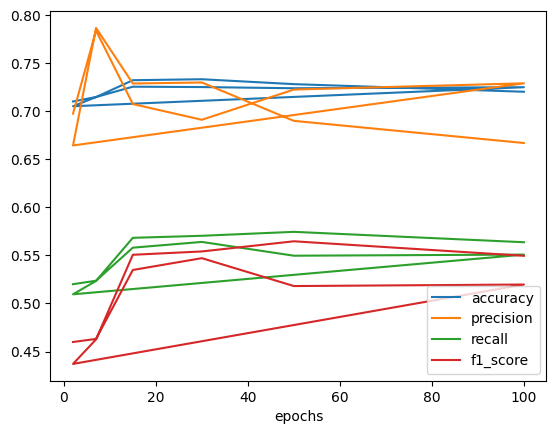

In [10]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "avg"]
lines = dfMetricsClass[metrics].plot.line(x='epochs')

lines

<AxesSubplot: xlabel='epochs'>

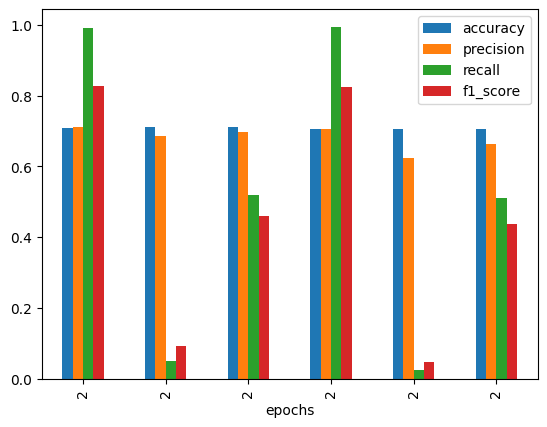

In [11]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['epochs'] == 2]
lines = dfMetricsClass[metrics].plot.bar(x='epochs')

lines

In [12]:
dsMetrics = pd.read_csv("result_trad_LSTM_over.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM,128,2,32,4,awake,0.702492,0.703577,0.995041,0.824303,0.014463,0.645734
1,LSTM,128,2,32,4,asleep,0.704114,0.564545,0.015346,0.029880,0.014391,0.645348
2,LSTM,128,2,32,4,avg,0.703303,0.634061,0.505194,0.427092,0.014427,0.645541
3,LSTM,128,7,32,4,awake,0.716837,0.714230,0.993974,0.831196,0.081400,0.692860
4,LSTM,128,7,32,4,asleep,0.718459,0.821724,0.066179,0.122493,0.081853,0.692397
5,LSTM,128,7,32,4,avg,0.717648,0.767977,0.530076,0.476844,0.081627,0.692628
6,LSTM,128,15,32,4,awake,0.729583,0.730890,0.972527,0.834570,0.169237,0.707760
7,LSTM,128,15,32,4,asleep,0.731028,0.709433,0.159467,0.260401,0.169933,0.707352
8,LSTM,128,15,32,4,avg,0.730306,0.720161,0.565997,0.547486,0.169585,0.707556
9,LSTM,128,30,32,4,awake,0.710622,0.708667,0.997479,0.828628,0.047383,0.686898


In [13]:
dsMetrics = pd.read_csv("result3epochsLSTM.csv")
print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,3,32,120,20,0,2023-03-07 01:52:30.982444,2023-03-07 01:54:10.806522,99.824078,...,0.701377,1.000000,0.824481,0.000000,0.500000,[[0 40697]\n [0 95585]],0.0,40697.0,0.0,95585.0
1,LSTM,128,3,32,120,20,0,2023-03-07 01:52:30.982444,2023-03-07 01:54:10.806522,99.824078,...,0.000000,0.000000,0.000000,0.000000,0.500000,[[95816 0]\n [40466 0]],95816.0,0.0,40466.0,0.0
2,LSTM,128,3,32,120,20,0,2023-03-07 01:52:30.982444,2023-03-07 01:54:10.806522,99.824078,...,0.350688,0.500000,0.412241,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,3,32,120,20,1,2023-03-07 01:54:11.525836,2023-03-07 01:55:39.071086,87.545250,...,0.701382,0.999979,0.824478,0.000040,0.500014,[[2 40695]\n [2 95583]],2.0,40695.0,2.0,95583.0
4,LSTM,128,3,32,120,20,1,2023-03-07 01:54:11.525836,2023-03-07 01:55:39.071086,87.545250,...,0.500000,0.000049,0.000099,0.000040,0.500014,[[95814 2]\n [40464 2]],95814.0,2.0,40464.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,LSTM,128,3,32,120,20,118,2023-03-07 04:38:25.470756,2023-03-07 04:39:48.391316,82.920560,...,0.583390,0.341966,0.431184,0.271253,0.619415,[[85934 9882]\n [26628 13838]],85934.0,9882.0,26628.0,13838.0
356,LSTM,128,3,32,120,20,118,2023-03-07 04:38:25.470756,2023-03-07 04:39:48.391316,82.920560,...,0.672574,0.619511,0.627537,0.270883,0.619236,NaN,NaN,NaN,NaN,NaN
357,LSTM,128,3,32,120,20,119,2023-03-07 04:39:49.119018,2023-03-07 04:41:12.174240,83.055222,...,0.761383,0.893069,0.821985,0.266818,0.617849,[[13944 26753]\n [10221 85364]],13944.0,26753.0,10221.0,85364.0
358,LSTM,128,3,32,120,20,119,2023-03-07 04:39:49.119018,2023-03-07 04:41:12.174240,83.055222,...,0.575253,0.343523,0.430165,0.267528,0.618200,[[85552 10264]\n [26565 13901]],85552.0,10264.0,26565.0,13901.0


In [14]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]

In [15]:
ss1[metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
335,avg,111,3,0.734774,0.678764,0.620875,0.629204


In [16]:
ss.loc[ss['recall'] == ss['f1_score'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score


In [17]:
dsMetrics.iloc[330:336][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
330,awake,110,3,0.733707,0.762238,0.901543,0.826058
331,asleep,110,3,0.734800,0.593077,0.340434,0.432568
332,avg,110,3,0.734253,0.677657,0.620989,0.629313
333,awake,111,3,0.734228,0.762072,0.902997,0.826571
334,asleep,111,3,0.735321,0.595456,0.338754,0.431836
335,avg,111,3,0.734774,0.678764,0.620875,0.629204


In [18]:
dsMetrics = pd.read_csv("result3epochsLSTM_oversample02_120_rounds.csv")
print(dsMetrics.columns)
dsMetrics


Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,3,32,120,20,0,2023-03-13 19:26:00.698095,2023-03-13 19:27:54.892752,114.194657,...,0.847964,0.019606,0.038325,0.006842,0.505675,[[40361 336]\n [93711 1874]],40361.0,336.0,93711.0,1874.0
1,LSTM,128,3,32,120,20,0,2023-03-13 19:26:00.698095,2023-03-13 19:27:54.892752,114.194657,...,0.299317,0.991697,0.459843,0.006747,0.505628,[[1874 93942]\n [336 40130]],1874.0,93942.0,336.0,40130.0
2,LSTM,128,3,32,120,20,0,2023-03-13 19:26:00.698095,2023-03-13 19:27:54.892752,114.194657,...,0.573640,0.505651,0.249084,0.006795,0.505651,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,3,32,120,20,1,2023-03-13 19:27:55.579658,2023-03-13 19:29:39.820421,104.240763,...,0.871246,0.057059,0.107104,0.022853,0.518627,[[39891 806]\n [90131 5454]],39891.0,806.0,90131.0,5454.0
4,LSTM,128,3,32,120,20,1,2023-03-13 19:27:55.579658,2023-03-13 19:29:39.820421,104.240763,...,0.305041,0.980131,0.465276,0.022617,0.518537,[[5456 90360]\n [804 39662]],5456.0,90360.0,804.0,39662.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,LSTM,128,3,32,120,20,118,2023-03-13 22:43:56.868105,2023-03-13 22:45:35.673660,98.805555,...,0.406333,0.646271,0.498955,0.211435,0.623748,[[57607 38209]\n [14314 26152]],57607.0,38209.0,14314.0,26152.0
356,LSTM,128,3,32,120,20,118,2023-03-13 22:43:56.868105,2023-03-13 22:45:35.673660,98.805555,...,0.603133,0.624082,0.592940,0.212119,0.623956,NaN,NaN,NaN,NaN,NaN
357,LSTM,128,3,32,120,20,119,2023-03-13 22:45:36.372521,2023-03-13 22:47:14.792260,98.419739,...,0.800287,0.605995,0.689719,0.215524,0.625404,[[26242 14455]\n [37661 57924]],26242.0,14455.0,37661.0,57924.0
358,LSTM,128,3,32,120,20,119,2023-03-13 22:45:36.372521,2023-03-13 22:47:14.792260,98.419739,...,0.408212,0.644640,0.499880,0.214135,0.624978,[[57999 37817]\n [14380 26086]],57999.0,37817.0,14380.0,26086.0


In [19]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()]


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
359,LSTM,128,3,32,120,20,119,2023-03-13 22:45:36.372521,2023-03-13 22:47:14.792260,98.419739,...,0.60425,0.625317,0.5948,0.214829,0.625191,NaN,NaN,NaN,NaN,NaN


In [20]:
ss.loc[ss['f1_score'] == ss['f1_score'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
359,avg,119,3,0.61729,0.60425,0.625317,0.5948


In [23]:
ss.loc[ss['recall'] == ss['recall'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
359,avg,119,3,0.61729,0.60425,0.625317,0.5948


In [22]:
dsMetrics.loc[dsMetrics['class'] == "asleep"][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
1,asleep,0,3,0.308214,0.299317,0.991697,0.459843
4,asleep,1,3,0.331064,0.305041,0.980131,0.465276
7,asleep,2,3,0.344858,0.308695,0.973336,0.468731
10,asleep,3,3,0.351939,0.310632,0.969901,0.470557
13,asleep,4,3,0.357024,0.312028,0.967281,0.471846
...,...,...,...,...,...,...,...
346,asleep,115,3,0.609904,0.402888,0.650867,0.497699
349,asleep,116,3,0.614623,0.406486,0.647408,0.499409
352,asleep,117,3,0.613030,0.405402,0.649780,0.499293
355,asleep,118,3,0.614601,0.406333,0.646271,0.498955


In [25]:
dsMetrics.iloc[356:360][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
356,avg,118,3,0.614898,0.603133,0.624082,0.592940
357,awake,119,3,0.617587,0.800287,0.605995,0.689719
358,asleep,119,3,0.616993,0.408212,0.644640,0.499880
359,avg,119,3,0.617290,0.604250,0.625317,0.594800


In [26]:
ss1 = dsMetrics.loc[dsMetrics['class'] == "asleep"][metrics]

In [27]:
ss1.loc[ss1['recall'] == ss1['recall'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
1,asleep,0,3,0.308214,0.299317,0.991697,0.459843


In [29]:
ss1.loc[ss1['f1_score'] == ss1['f1_score'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
358,asleep,119,3,0.616993,0.408212,0.64464,0.49988


In [30]:
ss1.loc[ss1['precision'] == ss1['precision'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
358,asleep,119,3,0.616993,0.408212,0.64464,0.49988


In [33]:
ss2 = dsMetrics.loc[dsMetrics['class'] == "awake"][metrics]
ss2.loc[ss2['precision'] == ss2['precision'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
12,awake,4,3,0.358631,0.877284,0.099472,0.178683


In [76]:
dsMetrics = pd.read_csv("result3epochsMLPunbalanced.csv")
#dsMetrics = pd.read_csv("result3epochsMLPunbalanced_batch10.csv")
print(dsMetrics.columns)
dsMetrics


Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,MLP,12,3,32,120,20,0,2023-03-07 10:43:28.181576,2023-03-07 10:43:47.877122,19.695546,...,0.702241,0.999937,0.825057,0.000327,0.500116,[[12 40575]\n [6 95693]],12.0,40575.0,6.0,95693.0
1,MLP,12,3,32,120,20,0,2023-03-07 10:43:28.181576,2023-03-07 10:43:47.877122,19.695546,...,0.666667,0.000296,0.000591,0.000327,0.500116,[[95693 6]\n [40575 12]],95693.0,6.0,40575.0,12.0
2,MLP,12,3,32,120,20,0,2023-03-07 10:43:28.181576,2023-03-07 10:43:47.877122,19.695546,...,0.684454,0.500116,0.412824,0.000327,0.500116,NaN,NaN,NaN,NaN,NaN
3,MLP,12,3,32,120,20,1,2023-03-07 10:43:48.596937,2023-03-07 10:43:59.459876,10.862939,...,0.702533,0.999781,0.825205,0.002285,0.500814,[[75 40512]\n [21 95678]],75.0,40512.0,21.0,95678.0
4,MLP,12,3,32,120,20,1,2023-03-07 10:43:48.596937,2023-03-07 10:43:59.459876,10.862939,...,0.781250,0.001848,0.003687,0.002285,0.500814,[[95678 21]\n [40512 75]],95678.0,21.0,40512.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,MLP,12,3,32,120,20,118,2023-03-07 11:05:39.206270,2023-03-07 11:05:48.988368,9.782098,...,0.707834,0.018922,0.036859,0.021688,0.507805,[[95382 317]\n [39819 768]],95382.0,317.0,39819.0,768.0
356,MLP,12,3,32,120,20,118,2023-03-07 11:05:39.206270,2023-03-07 11:05:48.988368,9.782098,...,0.706659,0.507805,0.431518,0.021688,0.507805,NaN,NaN,NaN,NaN,NaN
357,MLP,12,3,32,120,20,119,2023-03-07 11:05:49.698476,2023-03-07 11:05:59.421521,9.723045,...,0.706922,0.994399,0.826373,0.030859,0.511170,[[1134 39453]\n [536 95163]],1134.0,39453.0,536.0,95163.0
358,MLP,12,3,32,120,20,119,2023-03-07 11:05:49.698476,2023-03-07 11:05:59.421521,9.723045,...,0.679042,0.027940,0.053672,0.030859,0.511170,[[95163 536]\n [39453 1134]],95163.0,536.0,39453.0,1134.0


In [77]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
116,avg,38,3,0.735219,0.725159,0.576917,0.565701


In [78]:
ss.loc[ss['f1_score'] == ss['f1_score'].max()][metrics]


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
89,avg,29,3,0.73108,0.684071,0.591508,0.591643


In [79]:
ss.loc[ss['recall'] == ss['recall'].max()][metrics]


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
89,avg,29,3,0.73108,0.684071,0.591508,0.591643


In [80]:
dsMetrics.iloc[87:90][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
87,awake,29,3,0.73108,0.745577,0.936656,0.830264
88,asleep,29,3,0.73108,0.622564,0.246360,0.353022
89,avg,29,3,0.73108,0.684071,0.591508,0.591643


In [82]:
dsMetrics = pd.read_csv("result3epochsMLP_oversample01.csv")
print(dsMetrics.columns)
dsMetrics


Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,MLP,12,3,32,120,20,0,2023-03-07 13:35:41.103806,2023-03-07 13:36:02.741629,21.637823,...,0.786829,0.016855,0.033003,0.003658,0.503044,[[40150 437]\n [94086 1613]],40150.0,437.0,94086.0,1613.0
1,MLP,12,3,32,120,20,0,2023-03-07 13:35:41.103806,2023-03-07 13:36:02.741629,21.637823,...,0.299100,0.989233,0.459322,0.003658,0.503044,[[1613 94086]\n [437 40150]],1613.0,94086.0,437.0,40150.0
2,MLP,12,3,32,120,20,0,2023-03-07 13:35:41.103806,2023-03-07 13:36:02.741629,21.637823,...,0.542965,0.503044,0.246162,0.003658,0.503044,NaN,NaN,NaN,NaN,NaN
3,MLP,12,3,32,120,20,1,2023-03-07 13:36:03.466869,2023-03-07 13:36:16.391861,12.924992,...,0.817291,0.081098,0.147555,0.023797,0.519175,[[38852 1735]\n [87938 7761]],38852.0,1735.0,87938.0,7761.0
4,MLP,12,3,32,120,20,1,2023-03-07 13:36:03.466869,2023-03-07 13:36:16.391861,12.924992,...,0.306428,0.957252,0.464245,0.023797,0.519175,[[7761 87938]\n [1735 38852]],7761.0,87938.0,1735.0,38852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,MLP,12,3,32,120,20,118,2023-03-07 14:03:13.252499,2023-03-07 14:03:26.060921,12.808422,...,0.365427,0.804864,0.502643,0.157547,0.606049,[[38972 56727]\n [7920 32667]],38972.0,56727.0,7920.0,32667.0
356,MLP,12,3,32,120,20,118,2023-03-07 14:03:13.252499,2023-03-07 14:03:26.060921,12.808422,...,0.598264,0.606049,0.524635,0.157547,0.606049,NaN,NaN,NaN,NaN,NaN
357,MLP,12,3,32,120,20,119,2023-03-07 14:03:26.801644,2023-03-07 14:03:39.635532,12.833888,...,0.838112,0.334162,0.477816,0.129219,0.590985,[[34410 6177]\n [63720 31979]],34410.0,6177.0,63720.0,31979.0
358,MLP,12,3,32,120,20,119,2023-03-07 14:03:26.801644,2023-03-07 14:03:39.635532,12.833888,...,0.350657,0.847808,0.496118,0.129219,0.590985,[[31979 63720]\n [6177 34410]],31979.0,63720.0,6177.0,34410.0


In [83]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
257,avg,85,3,0.569097,0.597428,0.614453,0.560939


In [84]:
ss.loc[ss['f1_score'] == ss['f1_score'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
257,avg,85,3,0.569097,0.597428,0.614453,0.560939


In [85]:
ss.loc[ss['recall'] == ss['recall'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
257,avg,85,3,0.569097,0.597428,0.614453,0.560939


In [86]:
dsMetrics.iloc[254:258][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
254,avg,84,3,0.509069,0.587536,0.592659,0.508535
255,awake,85,3,0.569097,0.812457,0.502294,0.620790
256,asleep,85,3,0.569097,0.382399,0.726612,0.501087
257,avg,85,3,0.569097,0.597428,0.614453,0.560939


In [87]:
dsMetrics = pd.read_csv("result3epochsLSTM_oversample01.csv")
print(dsMetrics.columns)
dsMetrics


Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,3,32,20,20,0,2023-03-07 12:18:29.790614,2023-03-07 12:21:37.459405,187.668791,...,0.848569,0.019229,0.037606,0.006732,0.505585,[[40369 328]\n [93747 1838]],40369.0,328.0,93747.0,1838.0
1,LSTM,128,3,32,20,20,0,2023-03-07 12:18:29.790614,2023-03-07 12:21:37.459405,187.668791,...,0.299278,0.991894,0.459818,0.006639,0.505539,[[1838 93978]\n [328 40138]],1838.0,93978.0,328.0,40138.0
2,LSTM,128,3,32,20,20,0,2023-03-07 12:18:29.790614,2023-03-07 12:21:37.459405,187.668791,...,0.573924,0.505562,0.248712,0.006686,0.505562,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,3,32,20,20,1,2023-03-07 12:21:38.184884,2023-03-07 12:23:34.210579,116.025695,...,0.872354,0.058628,0.109873,0.023621,0.519240,[[39877 820]\n [89981 5604]],39877.0,820.0,89981.0,5604.0
4,LSTM,128,3,32,20,20,1,2023-03-07 12:21:38.184884,2023-03-07 12:23:34.210579,116.025695,...,0.305326,0.979810,0.465571,0.023399,0.519164,[[5607 90209]\n [817 39649]],5607.0,90209.0,817.0,39649.0
5,LSTM,128,3,32,20,20,1,2023-03-07 12:21:38.184884,2023-03-07 12:23:34.210579,116.025695,...,0.588840,0.519219,0.287722,0.023510,0.519202,NaN,NaN,NaN,NaN,NaN
6,LSTM,128,3,32,20,20,2,2023-03-07 12:23:34.930591,2023-03-07 12:25:30.627917,115.697326,...,0.875980,0.081802,0.149630,0.033884,0.527300,[[39590 1107]\n [87766 7819]],39590.0,1107.0,87766.0,7819.0
7,LSTM,128,3,32,20,20,2,2023-03-07 12:23:34.930591,2023-03-07 12:25:30.627917,115.697326,...,0.309086,0.972767,0.469116,0.033591,0.527212,[[7824 87992]\n [1102 39364]],7824.0,87992.0,1102.0,39364.0
8,LSTM,128,3,32,20,20,2,2023-03-07 12:23:34.930591,2023-03-07 12:25:30.627917,115.697326,...,0.592533,0.527284,0.309373,0.033738,0.527256,NaN,NaN,NaN,NaN,NaN
9,LSTM,128,3,32,20,20,3,2023-03-07 12:25:31.351321,2023-03-07 12:27:27.225133,115.873812,...,0.877539,0.092211,0.166886,0.038658,0.530994,[[39467 1230]\n [86771 8814]],39467.0,1230.0,86771.0,8814.0


In [2]:
dsMetrics = pd.read_csv("result_trad_MPL_unb_batch_size_32.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

FileNotFoundError: [Errno 2] No such file or directory: 'result_trad_MPL_unb_batch_size_32.csv'

In [35]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
359,avg,119,1,0.46242,0.59107,0.580421,0.460255


In [36]:
dsMetrics = pd.read_csv("result1epochsMLP_oversample_smote.csv")
print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,MLP,12,1,32,120,20,0,2023-03-14 05:18:17.734776,2023-03-14 05:18:32.421389,14.686613,...,0.000000,0.000000,0.000000,0.000000,0.500000,[[40587 0]\n [95699 0]],40587.0,0.0,95699.0,0.0
1,MLP,12,1,32,120,20,0,2023-03-14 05:18:17.734776,2023-03-14 05:18:32.421389,14.686613,...,0.297808,1.000000,0.458939,0.000000,0.500000,[[0 95699]\n [0 40587]],0.0,95699.0,0.0,40587.0
2,MLP,12,1,32,120,20,0,2023-03-14 05:18:17.734776,2023-03-14 05:18:32.421389,14.686613,...,0.148904,0.500000,0.229470,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,MLP,12,1,32,120,20,1,2023-03-14 05:18:33.108298,2023-03-14 05:18:40.016063,6.907765,...,0.000000,0.000000,0.000000,-0.000015,0.499988,[[40586 1]\n [95699 0]],40586.0,1.0,95699.0,0.0
4,MLP,12,1,32,120,20,1,2023-03-14 05:18:33.108298,2023-03-14 05:18:40.016063,6.907765,...,0.297802,0.999975,0.458931,-0.000015,0.499988,[[0 95699]\n [1 40586]],0.0,95699.0,1.0,40586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,MLP,12,1,32,120,20,118,2023-03-14 05:33:26.687190,2023-03-14 05:33:33.385272,6.698082,...,0.295921,0.954591,0.451788,-0.005283,0.495666,[[3516 92183]\n [1843 38744]],3516.0,92183.0,1843.0,38744.0
356,MLP,12,1,32,120,20,118,2023-03-14 05:33:26.687190,2023-03-14 05:33:33.385272,6.698082,...,0.476007,0.495666,0.260686,-0.005283,0.495666,NaN,NaN,NaN,NaN,NaN
357,MLP,12,1,32,120,20,119,2023-03-14 05:33:34.087160,2023-03-14 05:33:40.845642,6.758482,...,0.650823,0.029760,0.056917,-0.004786,0.496056,[[39059 1528]\n [92851 2848]],39059.0,1528.0,92851.0,2848.0
358,MLP,12,1,32,120,20,119,2023-03-14 05:33:34.087160,2023-03-14 05:33:40.845642,6.758482,...,0.296103,0.962352,0.452866,-0.004786,0.496056,[[2848 92851]\n [1528 39059]],2848.0,92851.0,1528.0,39059.0


In [37]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
338,avg,112,1,0.340842,0.512086,0.505018,0.312869


In [43]:
dsMetrics = pd.read_csv("result3epochsMLP_oversample_smote.csv")
print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]


Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
293,avg,97,3,0.524478,0.608286,0.61367,0.524116


In [45]:
dsMetrics.iloc[291:294][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
291,awake,97,3,0.524478,0.848291,0.393108,0.537248
292,asleep,97,3,0.524478,0.368281,0.834233,0.510983
293,avg,97,3,0.524478,0.608286,0.613670,0.524116


In [41]:
dsMetrics = pd.read_csv("result3epochsLSTM_oversample_smote.csv")
print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
359,avg,119,3,0.595761,0.601509,0.622346,0.580785


In [42]:
dsMetrics.iloc[357:360][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
357,awake,119,3,0.596154,0.807377,0.557127,0.659304
358,asleep,119,3,0.595368,0.395640,0.687565,0.502266
359,avg,119,3,0.595761,0.601509,0.622346,0.580785


In [13]:
dsMetrics = pd.read_csv("result_trad_LSTM_over_smote.csv")
print(dsMetrics.columns)
dsMetrics


Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,2,32,4,1,2023-03-14 06:03:28.394123,2023-03-14 06:06:01.373092,152.978969,2.549649,...,0.000000,0.000000,0.000000,0.000000,0.536638,[[40697 0]\n [95585 0]],40697.0,0.0,95585.0,0.0
1,LSTM,128,2,32,4,1,2023-03-14 06:03:28.394123,2023-03-14 06:06:01.373092,152.978969,2.549649,...,0.296928,1.000000,0.457895,0.000000,0.543843,[[0 95816]\n [0 40466]],0.0,95816.0,0.0,40466.0
2,LSTM,128,2,32,4,1,2023-03-14 06:03:28.394123,2023-03-14 06:06:01.373092,152.978969,2.549649,...,0.148464,0.500000,0.228947,0.000000,0.540240,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,7,32,4,1,2023-03-14 06:06:02.088441,2023-03-14 06:14:23.457369,501.368928,8.356149,...,0.000000,0.000000,0.000000,0.000000,0.688561,[[40697 0]\n [95585 0]],40697.0,0.0,95585.0,0.0
4,LSTM,128,7,32,4,1,2023-03-14 06:06:02.088441,2023-03-14 06:14:23.457369,501.368928,8.356149,...,0.296928,1.000000,0.457895,0.000000,0.633091,[[0 95816]\n [0 40466]],0.0,95816.0,0.0,40466.0
5,LSTM,128,7,32,4,1,2023-03-14 06:06:02.088441,2023-03-14 06:14:23.457369,501.368928,8.356149,...,0.148464,0.500000,0.228947,0.000000,0.660826,NaN,NaN,NaN,NaN,NaN
6,LSTM,128,15,32,4,1,2023-03-14 06:14:24.168494,2023-03-14 06:32:06.879728,1062.711234,17.711854,...,1.000000,0.000868,0.001735,0.000519,0.670181,[[40697 0]\n [95502 83]],40697.0,0.0,95502.0,83.0
7,LSTM,128,15,32,4,1,2023-03-14 06:14:24.168494,2023-03-14 06:32:06.879728,1062.711234,17.711854,...,0.297109,1.000000,0.458110,0.000515,0.538561,[[83 95733]\n [0 40466]],83.0,95733.0,0.0,40466.0
8,LSTM,128,15,32,4,1,2023-03-14 06:14:24.168494,2023-03-14 06:32:06.879728,1062.711234,17.711854,...,0.648555,0.500434,0.229923,0.000517,0.604371,NaN,NaN,NaN,NaN,NaN
9,LSTM,128,30,32,4,1,2023-03-14 06:32:07.589919,2023-03-14 07:07:09.439629,2101.849710,35.030828,...,0.889764,0.001182,0.002361,0.000501,0.667666,[[40683 14]\n [95472 113]],40683.0,14.0,95472.0,113.0


In [14]:
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

,class,epochs,accuracy,precision,recall,f1_score
35,avg,100,0.307095,0.516195,0.501577,0.248565


In [15]:
dsMetrics[metrics]

,class,epochs,accuracy,precision,recall,f1_score
0,awake,2,0.298623,0.000000,0.000000,0.000000
1,asleep,2,0.296928,0.296928,1.000000,0.457895
2,avg,2,0.297776,0.148464,0.500000,0.228947
3,awake,7,0.298623,0.000000,0.000000,0.000000
4,asleep,7,0.296928,0.296928,1.000000,0.457895
5,avg,7,0.297776,0.148464,0.500000,0.228947
6,awake,15,0.299232,1.000000,0.000868,0.001735
7,asleep,15,0.297537,0.297109,1.000000,0.458110
8,avg,15,0.298385,0.648555,0.500434,0.229923
9,awake,30,0.299350,0.889764,0.001182,0.002361
